In [12]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv', sep=',', decimal='.')

In [13]:
churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
fig = px.pie(
    data_frame=churn_data,
    names=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title='Соотношение ушедших и лояльных клиентов',
)

fig.show()

In [15]:
pie_data = churn_data.groupby('Exited')['Exited'].count()


fig = px.pie(
    data_frame=pie_data,
    names=['Лояльные', 'Ушедшие'],
    values=pie_data,
    title='Соотношение ушедших и лояльных клиентов',
    
)

fig.show()
fig.write_html('files to share/pie.html')

Text(0, 0.5, 'Количество клиентов')

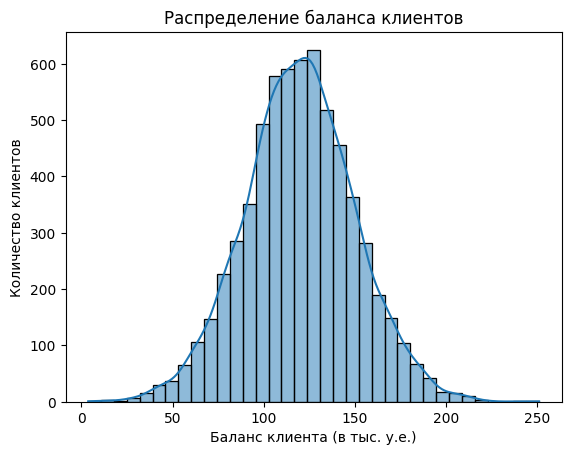

In [16]:
limited_balance = churn_data[churn_data['Balance'] >= 2500]

histogr = sns.histplot(
    limited_balance,
    x=limited_balance['Balance'] / 1000,
    bins=35,
    kde=True,
)

histogr.set_title('Распределение баланса клиентов')
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)')
histogr.set_ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

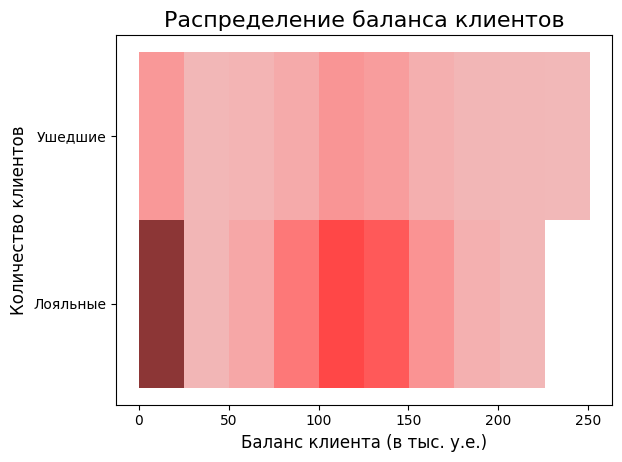

In [17]:
histogr = sns.histplot(
    churn_data,
    x=churn_data['Balance'] / 1000,
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    bins=10,
    kde=True,
    color='red'
)

histogr.set_title('Распределение баланса клиентов', fontsize=16)
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)', fontsize=12)
histogr.set_ylabel('Количество клиентов', fontsize=12)

In [21]:
age_box = px.box(
    churn_data,
    x='Age',
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title='Возрастное распределение клиентов',
    height=600,
    width=1000,
)

age_box.update_layout(
    xaxis_title='Возраст',
    yaxis_title='Категория',
    title_font_size=20
)

age_box.show()
age_box.write_html('files to share/age_box.html')

In [25]:
fig = px.scatter(
    data_frame=churn_data,
    x=churn_data['EstimatedSalary'] / 1000,
    y='CreditScore',
    color=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title= 'Зависимость кредитного рейтинга от дохода клиента',
    height=750,
    width=1100
)

fig.update_layout(
    xaxis_title='Доход клиента (в тыс. у.е.)',
    yaxis_title='Кредитный рейтинг',
    title_font_size=20,
    legend_font_size=14,
    legend_title='Группа'
)

fig.show()

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Exited'>

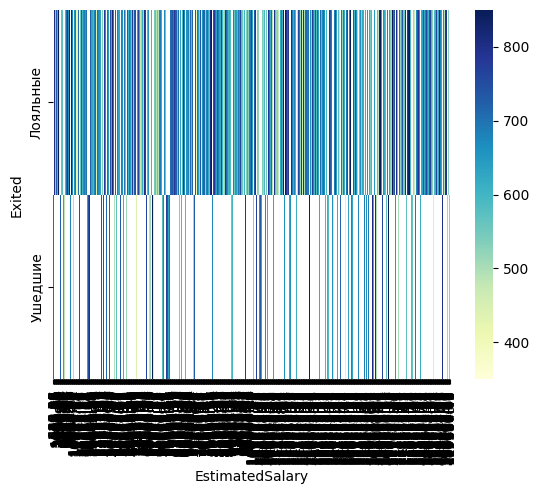

In [83]:
pivot = pd.pivot_table(
    data=churn_data,
    values='CreditScore',
    index=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    columns=churn_data['EstimatedSalary']
)

sns.heatmap(pivot, cmap='YlGnBu', xticklabels=10)